## Importing Libraries

In [1]:
import os
import cv2  # For image processing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# from tensorflow.keras.preprocessing.image import ImageDataGenerator  # ...Ensuring ImageDataGenerator is imported here

## Loading Images and Converting to Grayscale

Loading images from: H:\Fall 25\cse445\project again\GIT-445-Group-08-ML-Project-main\Images
Successfully loaded 50 images


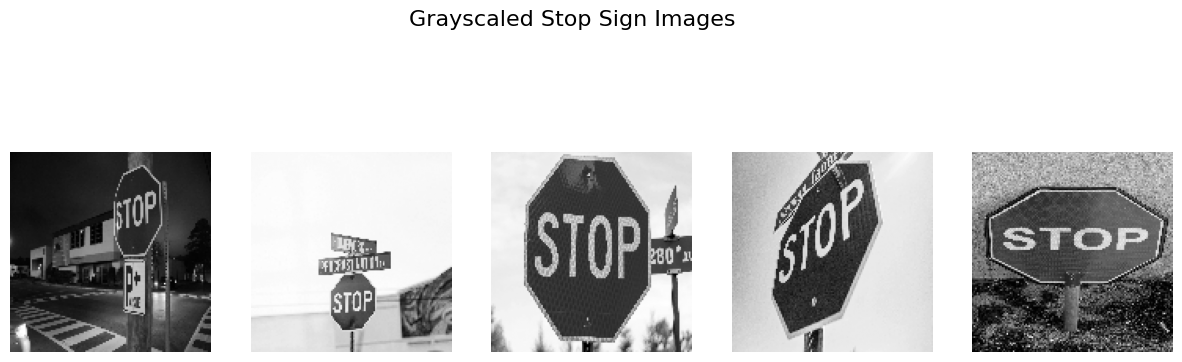

In [2]:
# Path for images with stop signs
path = r"H:\Fall 25\cse445\project again\GIT-445-Group-08-ML-Project-main\Images"

# Defining image size
size = (128, 128)

# Lists to store images and labels
images = []
labels = []  # Label 1 for images with stop signs

# Check if path exists before processing
if not os.path.exists(path):
    print(f"Error: Folder not found at: {path}")
    print("Please update the path variable with the correct path to your images folder.")
else:
    print(f"Loading images from: {path}")
    # Loading, processing, and appending images
    for file_name in os.listdir(path):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            img_path = os.path.join(path, file_name)
            img = cv2.imread(img_path)  # Loading image
            if img is not None:
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Converting to GRAYSCALE
                gray_img = cv2.resize(gray_img, size)  # Resizing to 128x128
                gray_img = gray_img / 255.0  # Normalizing pixel values to [0, 1]
                images.append(gray_img)  # Adding processed image
                labels.append(1)  # Assigning label 1 for images with stop signs
            else:
                print(f"Warning: Could not read image: {img_path}")
    
    print(f"Successfully loaded {len(images)} images")

# Converting to numpy arrays
if len(images) > 0:
    X = np.array(images)
    y = np.array(labels)
    
    # Reshaping X to include a single channel for grayscale (batch, height, width, channels)
    X = X.reshape(-1, 128, 128, 1)
    
    # DISPLAYING the first 5 processed grayscale images (or fewer if less than 5)
    num_display = min(5, len(images))
    fig, axs = plt.subplots(1, num_display, figsize=(15, 5))  # Creating subplots
    if num_display == 1:
        axs = [axs]  # Make it iterable if only one image
    for i in range(num_display):
        axs[i].imshow(X[i].squeeze(), cmap='gray')  # Displaying grayscaled images
        axs[i].axis('off')  # Hiding axes
    plt.suptitle("Grayscaled Stop Sign Images", fontsize=16)
    plt.show()
else:
    print("No images were loaded. Please check the path and ensure images are in the folder.")